# 1. Import Libraries

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import re, string, json, tweepy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from wordcloud import WordCloud

# 2. Prepare Training Data & Model Fitting

In [2]:
df_train = pd.read_csv('train_clean.csv')
df_train.dropna(how='any',inplace=True)
df_train = df_train.reset_index(drop=True)
df_train.head()

,Sentiment,Tweets
0,1,im getting on borderlands and i will murder yo...
1,1,i am coming to the borders and i will kill you al
2,1,im getting on borderlands and i will kill you al
3,1,im coming on borderlands and i will murder you al
4,1,im getting on borderlands and i will murder yo...


In [3]:
df_train.isnull().sum().sum()

0

In [4]:
# Inisialisasi model
vectorizer = TfidfVectorizer()
model_g = GaussianNB()

In [5]:
v_data = vectorizer.fit_transform(df_train['Tweets']).toarray()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(v_data, df_train['Sentiment'], test_size=0.2, random_state=10)
model_g.fit(X_train,y_train)
y_pred = model_g.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8121643707681532


In [7]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2929 1486]
 [ 123 4028]]
              precision    recall  f1-score   support

           0       0.96      0.66      0.78      4415
           1       0.73      0.97      0.83      4151

    accuracy                           0.81      8566
   macro avg       0.85      0.82      0.81      8566
weighted avg       0.85      0.81      0.81      8566



# 3. Get Tweets Data

In [37]:
dataset_1 = pd.read_csv('UkraineRussiaWar.csv')

In [22]:
# Tweets cleaning functions

## Case Folding
def case_folding(data):
    data = data.lower()
    data = re.sub('@[^\s]+','',data)
    data = ' '.join(re.sub("(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",data).split())
    data = re.sub(r"\d+", "", data)
    data = re.sub(r"\n","",data)
    data = re.sub(r"\t","",data)
    data = data.translate(str.maketrans("","",string.punctuation))
    return data

## Remove Stopwords
def remove_stopwords(data):
    sw_indonesia = stopwords.words("indonesian")
    data  = [word for word in data if word not in sw_indonesia]
    data = ' '.join(data)
    return data

# Stemming
def words_stemming(data):
    ps = PorterStemmer()
    data = ps.stem(data)
    return data     

## Remove Slang
def remove_slang(data, slang_data):
    remove_slang = []
    for tweet in clean_text_tweets:
        word_list = []
        for word in word_tokenize(tweet):
            if slang_data.get(word):
                word = slang_data[word]
            word_list.append(word)
        remove_slang.append(' '.join(word_list))
    return remove_slang

## Distribusi Frekuensi Kata
def word_frequency(list):
    tokenizedData = []
    for sentence in list:
        t_kata = word_tokenize(sentence)
        tokenizedData += t_kata

    return FreqDist(tokenizedData)

In [38]:
# Menjalankan pembersihan data
clean_tweets = []
for i in range(len(dataset_1['tweet'])):
    data = case_folding(dataset_1['tweet'][i])
    data = word_tokenize(data)
    data = remove_stopwords(data)
    data = words_stemming(data)
    clean_tweets.append(data)

In [39]:
dataset_1['clean_tweet'] = clean_tweets
dataset_1.head()

,tweet,clean_tweet
0,The story of two sisters torn apart by Russia'...,the story of two sisters torn apart by russia ...
1,Gorlovka direction⚡️VKS of the Russian Federat...,gorlovka direction vks of the russian federati...
2,@JulianRoepcke Facing reality is sometimes a b...,facing reality is sometimes a bad thing i thin...
3,"@Podolyak_M ""Financing terrorism""\n\n#Oil #gas...",financing terror
4,"DNIPROPETROVSK OBLAST: ON THIS KEY REGION, MUL...",dnipropetrovsk oblast on this key region multi...


In [40]:
dataset_1 = dataset_1.drop_duplicates()

In [41]:
dataset_1.reset_index(inplace=True)

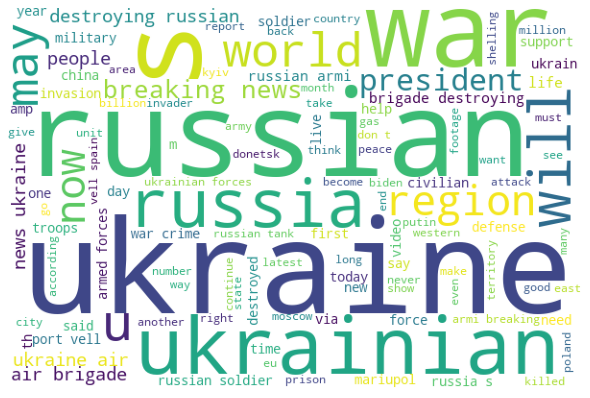

In [44]:
wordcloud = WordCloud(width = 600, height = 400,
                background_color ='white',
                min_font_size = 10).generate(' '.join(dataset_1['clean_tweet']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [35]:
print(word_frequency(clean_tweets).most_common(20))

[('the', 916), ('to', 511), ('of', 380), ('in', 336), ('a', 290), ('and', 261), ('russian', 232), ('ukraine', 200), ('is', 173), ('s', 170), ('on', 167), ('russia', 150), ('take', 145), ('streets', 136), ('by', 135), ('for', 124), ('news', 112), ('war', 100), ('breaking', 96), ('out', 94)]


In [43]:
len(dataset_1)

981

In [45]:
# Kedua, dilakukan analisis sentimen menggunakan naive bayes dengan dataset training yang sudah ada

v_data = vectorizer.transform(dataset_1["clean_tweet"]).toarray()
y_classification = model_g.predict(v_data)

dataset_1["Sentiment"] = list(y_classification)

display(dataset_1)

,index,tweet,clean_tweet,Sentiment
0,0,The story of two sisters torn apart by Russia'...,the story of two sisters torn apart by russia ...,1
1,1,Gorlovka direction⚡️VKS of the Russian Federat...,gorlovka direction vks of the russian federati...,0
2,2,@JulianRoepcke Facing reality is sometimes a b...,facing reality is sometimes a bad thing i thin...,1
3,3,"@Podolyak_M ""Financing terrorism""\n\n#Oil #gas...",financing terror,0
4,4,"DNIPROPETROVSK OBLAST: ON THIS KEY REGION, MUL...",dnipropetrovsk oblast on this key region multi...,0
...,...,...,...,...
976,995,I wondered ... What would happen if the presid...,i wondered what would happen if the president ...,0
977,996,Zelensky just sold Ukraine to Poland through a...,zelensky just sold ukraine to poland through a...,0
978,997,Debunking Russian Propaganda: Ukrainian Langua...,debunking russian propaganda ukrainian languag...,1
979,998,"⚠️‼️Russia will soon put about 50 new RS-28 ""S...",russia will soon put about new rs sarmat inter...,0


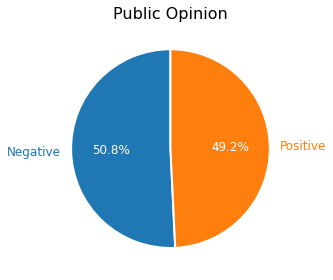

In [46]:
labels = ['Negative', 'Positive']

fig, ax = plt.subplots()
patches, texts, pcts = ax.pie( dataset_1['Sentiment'].value_counts(), 
        labels=labels, autopct='%.1f%%',
        wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
        textprops={'size': 'large'},
        startangle=90
        )
ax.set_title('Public Opinion', fontsize=16)
plt.setp(pcts, color='white')
fig.set_facecolor('white')
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.tight_layout()
plt.show()

In [48]:
positive_tweets = dataset_1.loc[dataset_1['Sentiment']==1]
negative_tweets = dataset_1.loc[dataset_1['Sentiment']==0]


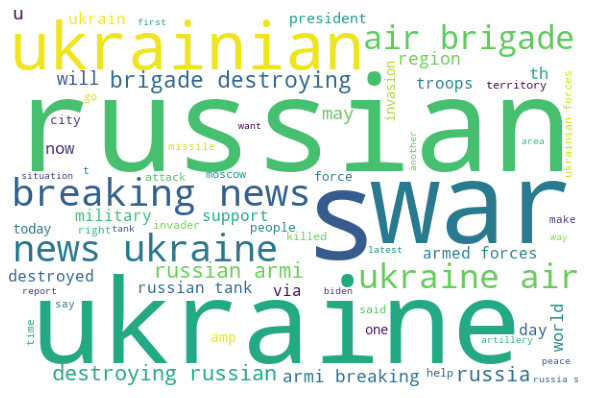

In [49]:
wordcloud_pos = WordCloud(width = 600, height = 400,
                background_color ='white',
                min_font_size = 10).generate(' '.join(positive_tweets['clean_tweet']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_pos)
plt.axis("off")
plt.tight_layout(pad = 0)

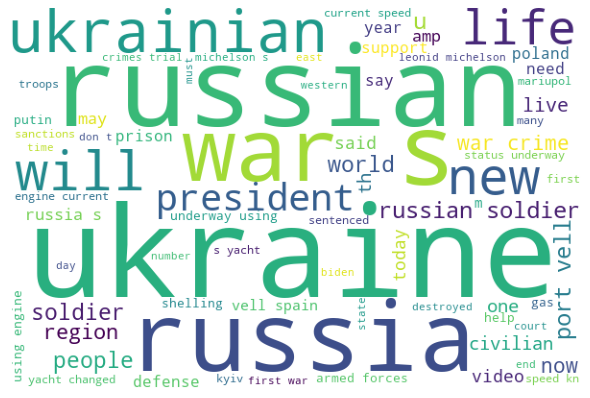

In [50]:
wordcloud_neg = WordCloud(width = 600, height = 400,
                background_color ='white',
                min_font_size = 10).generate(' '.join(negative_tweets['clean_tweet']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_neg)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()